---
title: "Naive Bayes"
format:
  html:
    toc: true
    code-fold: true
---

## Introduction

Naive Bayes(NB) classification is a probabilistic machine learning technique based on Bayes' theorem. It's widely used for various classification tasks, such as spam detection, sentiment analysis, and more. Its primary objective is to predict the class or category of a given data point based on the observed features. For the purpose of this study, I will perform NB on a recorded dataset(`CA_climate_fire`) and a text dataset(`articles_with_sentiment`).

### How Naive Bayes Works:

1. **Probabilistic Nature**: Naive Bayes is probabilistic in nature because it estimates the probability of a data point belonging to a particular class or category. It does this by calculating the conditional probabilities of the features given the class.

2. **Bayes' Theorem Foundation**: It's built upon Bayes' theorem, which describes how to update the probability for a hypothesis based on new evidence. In classification, it's used to calculate the probability of a class given the observed features. The "Naive" part of Naive Bayes is the assumption that the features are conditionally independent, which simplifies the calculations.

### Objectives of Naive Bayes Classification:

In both datasets, the objective is to classify or predict something based on the given features. In the first dataset, we aim to predict the occurrence of a fire based on weather variable precipitation. In the second dataset, we want to classify the sentiment of text based on the content of the article.

### Different Variants of Naive Bayes:

1. **Gaussian Naive Bayes**: Use this when features are continuous and have a Gaussian (normal) distribution. 
2. **Multinomial Naive Bayes**: Suitable for discrete data, often used for text classification with features like word counts. I am using this model predicting sentiments basing on the contents of the articles for the text dataset.
3. **Bernoulli Naive Bayes**: Appropriate when dealing with binary or Boolean features. It's often used for binary text classification where the presence or absence of words matters. 

## Naive Bayes on California Wildfire Statistics

After having a basic idea on Naive Bayes concept, let's predict the occurrence of fires in California based on climatic conditions using the Gaussian Naive Bayes classifier. The process involves data preprocessing, feature selection, model training, testing, and evaluation to determine the model's performance in terms of accuracy and other metrics. The visualization of the confusion matrix further aids in understanding the model's true positive, true negative, false positive, and false negative predictions.

### Code Overview

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from itertools import chain, combinations
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
CA_climate_fire = pd.read_csv('../data/cleaned-data/CA_climate_fire.csv')
CA_climate_fire_filtered = CA_climate_fire[['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'fire']]

# Split the dataset into features and the target variable 
X = CA_climate_fire_filtered.drop(columns=["fire"]) 
y = CA_climate_fire_filtered["fire"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# Initialize variables to keep track of the best feature set and its accuracy
best_feature_set = None
best_accuracy = 0.0
# Generate all possible feature combinations using the powerset function
all_feature_combinations = list(powerset(X.columns))

# Loop through each feature combination
for feature_set in all_feature_combinations:
    if len(feature_set) > 0:  # Skip the empty set
        # Subset the training and testing data using the current feature set
        X_train_subset = X_train[list(feature_set)]
        X_test_subset = X_test[list(feature_set)]

        # Initialize and train a Gaussian Naïve Bayes classifier
        gnb = GaussianNB()
        gnb.fit(X_train_subset, y_train)

        # Make predictions on the testing data
        y_pred = gnb.predict(X_test_subset)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Update the best feature set if the current one is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_set = feature_set

# Print the best feature set and its accuracy
print("Best Feature Set:", best_feature_set)
print("Best Accuracy:", best_accuracy)

Best Feature Set: ('tempmax', 'tempmin')
Best Accuracy: 0.8773333333333333


1. **Data Loading & Preprocessing**:
   - Necessary libraries for data handling, modeling, and visualization are imported.
   - The `CA_climate_fire` dataset is loaded, which contains information about various climatic factors and their association with fire occurrences in California.
   - A subset of the dataset, `CA_climate_fire_filtered`, is created to retain only the relevant columns for the study: 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', and 'fire'.

2. **Data Splitting**:
   - The dataset is split into features (`X`) and target labels (`y`). The goal is to predict the 'fire' occurrence based on the climatic factors.
   - The data is further split into training and testing sets using an 80:20 ratio.

3. **Feature Selection**:
   - The `powerset` function is defined to generate all possible combinations of features.
   - The best combination of features that gives the highest accuracy using the Gaussian Naive Bayes model is identified. The combination found to be best is 'tempmax' and 'tempmin'.

Accuracy: 0.8773333333333333
Confusion Matrix:
[[313  12]
 [ 34  16]]
Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.96      0.93       325
         Yes       0.57      0.32      0.41        50

    accuracy                           0.88       375
   macro avg       0.74      0.64      0.67       375
weighted avg       0.86      0.88      0.86       375



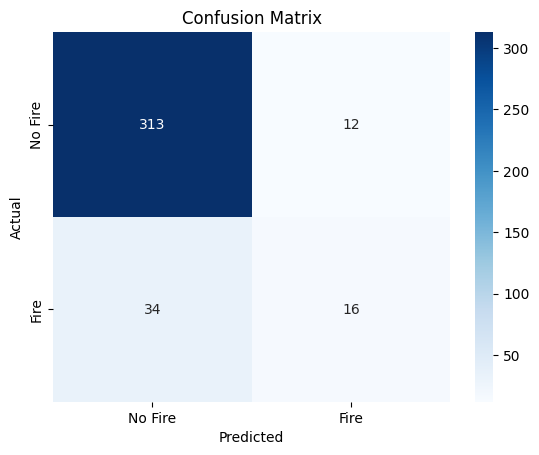

In [4]:
# Split the dataset into features (X) and the target variable (y)
X = CA_climate_fire_filtered[['tempmax', 'tempmin']]
y = CA_climate_fire_filtered['fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)


# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

# Display the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fire', 'Fire'], 
            yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

4. **Model Training & Testing**:
   - Using the best features ('tempmax' and 'tempmin'), the Gaussian Naive Bayes model is trained on the training data.
   - The trained model is then used to predict fire occurrences on the testing data.

5. **Model Evaluation**:
   - Various metrics such as accuracy, confusion matrix, precision, recall, and F1-score are calculated to evaluate the model's performance on the testing data.
   - A heatmap (visualization) of the confusion matrix is displayed to provide insights into the model's predictions.


**Findings**: The Gaussian Naive Bayes model trained on the `CA_climate_fire` dataset, using the 'tempmax' and 'tempmin' features, achieved an accuracy of 87.73%. The confusion matrix provides detailed insights into the predictions, indicating that the model identified 313 true negatives and 16 true positives. However, there were 34 false negatives and 12 false positives.

1. **Accuracy**: This is a ratio of correctly predicted observation to the total observations. In this case, it was 87.73%.
2. **Precision**: It is the ratio of correctly predicted positive observations to the total predicted positives. For class 'No Fire', it was 90%.
3. **Recall**: It is the ratio of correctly predicted positive observations to all the actual positives. For class 'No Fire', it was 96%.
4. **F1-Score**: It is the weighted average of precision and recall. For class 'No Fire', it was 93%.

Overfitting occurs when a model learns the training data too well, capturing noise and outliers, making it perform poorly on unseen data. Underfitting is the opposite, where the model fails to capture the underlying trend of the data. Given the accuracy of 87.73%, it seems the model is performing decently. However, because the dataset is extremely unbalanced because of the occurence of fire is not as often, this precision, recall and F1 score for "No Fire" is not as important as that of "Fire".

1. **Precision** for the "Fire" class: 57.14%
2. **Recall** for the "Fire" class: 32%
3. **F-1 Score** for the "Fire" class: 41%

The precision, recall, and F1-score for class 'Fire' are relatively low, suggesting the model struggles more with predicting fire occurrences compared to non-occurrences.

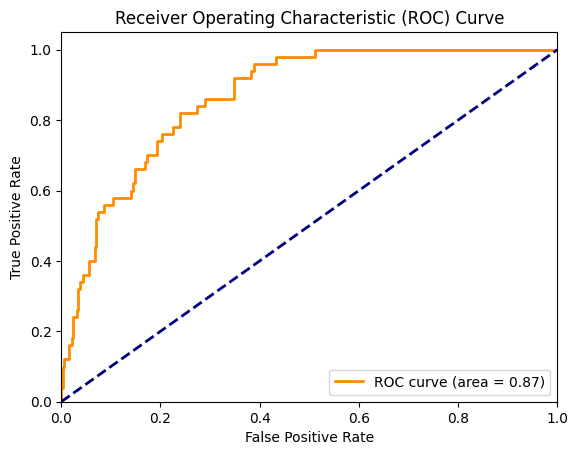

In [8]:
# Predict the probabilities of the testing data
y_prob = gnb.predict_proba(X_test)[:, 1]  # Only probabilities for 'Fire'

# Compute ROC curve and ROC area (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1. **ROC Curve Shape**: The curve starts from the bottom-left corner and moves towards the top-right corner. It's above the diagonal dashed line, which represents a random classifier. The further away the curve is from this diagonal line (towards the top-left corner), the better the classifier's performance.
   
2. **Area Under the Curve (AUC)**: The area under the ROC curve is given as 0.87. AUC provides a single number summary of the classifier's performance across all thresholds. The maximum AUC value is 1, which corresponds to a perfect classifier. An AUC of 0.5 corresponds to a random classifier (no discriminative power). The given AUC of 0.87 indicates a good classifier.

3. **Ideal Point**: The top-left corner of the ROC space, where TPR=1 and FPR=0, represents the ideal point where we have maximum true positives and no false positives. While the curve doesn't touch this point, it does come relatively close, suggesting the classifier has a good trade-off between sensitivity and specificity.

### Conclusion

So far, we have applied the Gaussian Naive Bayes classifier to predict fire occurrences based on climatic conditions in California. Using the features 'tempmax' and 'tempmin', the model achieved an accuracy of 87.73%. While this indicates a good overall fit, the model's lower precision and recall for actual fire occurrences suggest there's room for improvement.

The main reason for the poor performance on the NB model on predicting the occurence of wildfire is that we are dealing with a highly unbalanced dataset. Classifying such dataset presents a challenge because our Gaussian Naive Bayes algorithm is biased towards the majority class (No Fire), leading to poor performance on the minority class (Fire), which is of higher interest. Here are some strategies and best practices for dealing with highly unbalanced datasets:

1. **Resampling Techniques**:
   - **Upsampling (Over-sampling) the Minority Class**: Create copies of instances from the minority class or generate synthetic samples using methods like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN.
   - **Downsampling (Under-sampling) the Majority Class**: Reduce the number of instances from the majority class to balance the class distribution. This can lead to loss of information.
   - **Using Ensemble Resampling**: Combine over- and under-sampling techniques with ensemble methods like bagging and boosting.

2. **Cost-sensitive Learning**:
   - Adjust the algorithm to penalize misclassifying the minority class more than the majority class.
   - Many algorithms have a parameter that allows setting class weights (e.g., `class_weight` in scikit-learn algorithms).

3. **Anomaly Detection Approach**:
   - Treat the problem as an anomaly (or outlier) detection task rather than a classification task. This is especially useful when the minority class can be considered an "anomaly" relative to the majority class.

4. **Using Different Evaluation Metrics**:
   - Accuracy is not a good metric for unbalanced datasets.
   - Focus on metrics like Precision, Recall, F1-score, Area Under the Precision-Recall Curve (AUPRC), and Area Under the Receiver Operating Characteristic Curve (AUROC).

5. **Ensemble Methods**:
   - Ensemble methods, such as Random Forest or Gradient Boosting, can improve performance on imbalanced datasets.
   - Additionally, techniques like Balanced Random Forest and Easy Ensemble can be effective.

6. **Using Different Algorithms**:
   - Some algorithms, like k-Nearest Neighbors, might inherently handle imbalance better than others.
   - Neural networks with appropriate architectures and loss functions can also be explored.

7. **Analyze the Problem Domain**:
   - Incorporate domain-specific knowledge to engineer relevant features.
   - Sometimes, understanding the reasons behind the imbalance can provide insights into the right resampling or modeling approach.

## Naive Bayes on Wildfire Prevention Articles

In this section, we will perform Gaussian Naive Bayes on the wildfire prevention text dataset to build and evaluate a sentiment analysis model for the set of articles. 

### Code Overview

In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
articles_with_sentiment = pd.read_csv("../data/cleaned-data/articles_with_sentiment.csv")
# Create a 'sentiment' column based on the 'compound' values
articles_with_sentiment['sentiment'] = articles_with_sentiment['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

y=[]
#ITERATE OVER ROWS

for i in range(0,articles_with_sentiment.shape[0]):
    # CONVERT STRINGS TO INT TAGS
    if(articles_with_sentiment["sentiment"][i]=="positive"):
        y.append(1)
    if(articles_with_sentiment["sentiment"][i]=="neutral"):
        y.append(0)
    if(articles_with_sentiment["sentiment"][i]=="negative"):
        y.append(-1)

    if(i<3):
        print(i)
        print(articles_with_sentiment["content"][i].replace("<br />",""),'\n')
        print(articles_with_sentiment["sentiment"][i],y[i])
        
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

0
"people have been let off the leash," thomas mayo says quietly, swiping through screenshots racist memes depicting first nations australians as "grifters", "wife beaters" and "primitives" flash ac… [+9064 chars] 

negative -1
1
in 2019 and 2020, a megafire scorched eastern australia, destroying some 24 million hectares of land, and adding to the hole in the ozone layer another massive fire ate away parts of northern califo… [+7274 chars] 

negative -1
2
all a wildfire needs is oxygen, an ignition to spark it, and fuel to burn its crackling embers and flickering flames dont know the difference between the california foothills, where residents are us… [+10837 chars] 

positive 1


Here, we create a new `sentiment` column in the DataFrame based on the values in the `compound` column. This column categorizes sentiment as positive, neutral, or negative.
Iterate over the rows of the DataFrame to convert string sentiments ("positive", "neutral", "negative") into numerical labels (1, 0, -1) and store them in a list y. The first 3 rows are also printed for inspection. Lastly, we convert the list y to a numpy array for the subsequent modeling process.

In [ ]:
#| echo: false
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the JSON data from the file
with open("../data/raw-data/articles.json", "r") as json_file:
    data = json.load(json_file)
    articles = pd.DataFrame(data)

verbose=True

def string_cleaner(input_string):
    out = ''
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out
    
article_keys = articles.columns
print("AVAILABLE KEYS:")
print(article_keys)

index = 0
cleaned_data = []

for _, article in articles.iterrows():
    tmp = []
    if verbose:
        print("#------------------------------------------")
        print("#", index)
        print("#------------------------------------------")

    for key in article_keys:
        if verbose:
            print("----------------")
            print(key)
            print(article[key])  # Access the value directly

        if key == 'source':
            src = string_cleaner(article['source']['name'])
            tmp.append(src)

        if key == 'author':
            author = string_cleaner(article['author'])
            # ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
            if src in author:
                print(" AUTHOR ERROR:", author)
                author = 'NA'
            tmp.append(author)

        if key == 'title':
            tmp.append(string_cleaner(article['title']))

        if key == 'description':
            tmp.append(string_cleaner(article['description']))

        if key == 'content':
            tmp.append(string_cleaner(article['content']))

        if key == 'publishedAt':
            # DEFINE DATA PATTERN FOR RE TO CHECK  .* --> wildcard
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date = article['publishedAt']
            if not ref.match(date):
                print(" DATE ERROR:", date)
                date = "NA"
            tmp.append(date)

    cleaned_data.append(tmp)
    index += 1

# Define a filter condition to check for "[removed]" in column 5
filter_condition = lambda article: article[5] != "[removed]"

# Use a list comprehension to create a new cleaned_data list with rows that satisfy the condition
cleaned_data_filtered = [article for article in cleaned_data if filter_condition(article)]

In [12]:
def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES)   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs=vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)
content_data = [article[5] for article in cleaned_data_filtered] 
(x,vocab0)=vectorize(content_data,MAX_FEATURES=500)
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(98, 500) (98,)


Extract content data from the cleaned text dataset gained from the previous process and vectorize it using a CountVectorizer. The resulting matrix x and its vocabulary vocab0 are then further processed to reorder columns based on word frequency and remap the vocabulary accordingly.

In [13]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()
# DOUBLE CHECK 
print(x.shape,y.shape)

[ 4.  2.  2.  2.  2.  3.  2.  2.  2.  1.  3. 34.  2.  4.  8.  1.  1.  2.
  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  3.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  3.  7. 20.  7. 18.  2.  4.
  2.  1.  3.  2.  2. 13.  6. 47.  2.  5.  9.  7.  2.  3.  9.  2.  8.  4.
  2.  5.  2.  2.  2.  2.  3.  2.  2. 11.  6.  2.  4.  2.  2.  2.  4.  1.
  2.  3. 12.  2.  3.  7.  2.  3.  5.  2.  2.  2.  3.  1. 98.  5. 20.  2.
  5.  8.  1.  3.  2.  3.  3.  2.  5.  3.  3.  2.  2.  2.  2.  6.  2.  2.
  3.  3.  2.  2.  5.  2.  5.  2.  3.  2.  3.  6.  2.  1.  2.  4. 19.  3.
  2.  2.  2.  4.  2.  1.  3.  2.  4.  1.  5.  5.  3.  2.  6. 12.  5.  2.
  2.  3.  5.  5.  2.  2.  2. 12.  3.  2.  2.  1.  9.  2.  2.  2.  5.  3.
 18.  2.  2.  3.  5.  3.  2.  2.  2. 21.  8.  2.  7. 21. 14.  5.  5.  2.
  3.  4.  3.  4.  2.  2.  4.  2.  2.  3. 48. 18. 18.  2.  5.  9. 27.  3.
 10.  2.  2.  3.  1.  3.  1.  2.  3.  6.  3. 11.  2. 14.  6.  6.  2.  2.
  2.  2.  3.  2.  2. 20.  3.  1.  5.  2.  4.  3.  2

 The code reorders the columns of the matrix based on term frequencies, updates the associated vocabulary to reflect this reordering, and checks data consistency at various steps.

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Chi-Squared Feature Selection
k_best = SelectKBest(score_func=chi2, k=500)  
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Model Building
mnb = MultinomialNB()
mnb.fit(X_train_selected, y_train)

# Model Evaluation
y_pred = mnb.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

# Get the feature names corresponding to the selected features
selected_feature_indices = k_best.get_support(indices=True)
# Create the selected_features variable using vocab2
selected_features = [vocab2[i] for i in selected_feature_indices]

Accuracy: 0.9
Confusion Matrix:
[[9 0 1]
 [0 5 0]
 [1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90        10
           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



**Feature Selection & Model Building**:

- Split the dataset into training and testing sets using a 80-20 split ratio.
- Apply Chi-Squared feature selection to retain the top 500 best features from the data.
- Build a Multinomial Naive Bayes classifier using the selected features from the training set.
- Train the model on the training data and make predictions on the testing data.

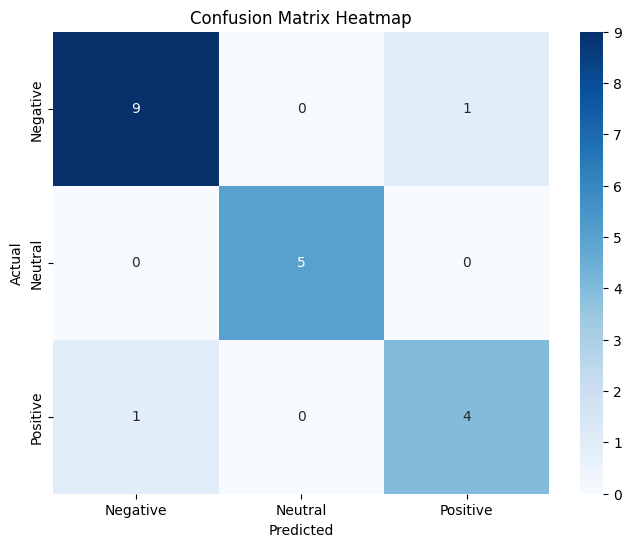

In [17]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

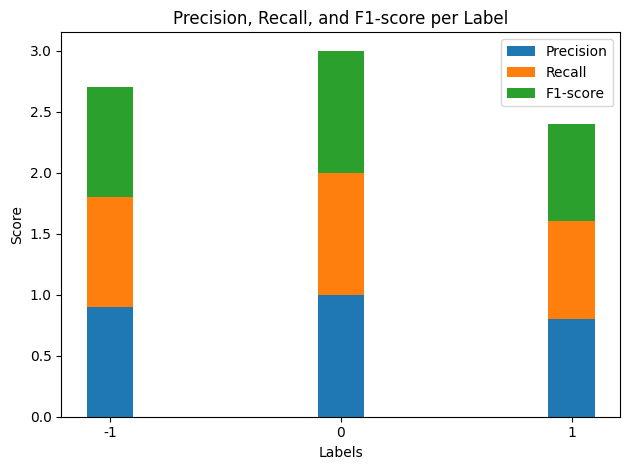

In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

x = range(len(labels))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar(x, recall, width=0.2, label='Recall', bottom=precision, align='center')
plt.bar(x, f1_score, width=0.2, label='F1-score', bottom=[i+j for i,j in zip(precision, recall)], align='center')

plt.xlabel('Labels')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score per Label')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


**Findings**:

**1. Visualizations:**
   
   a. **Confusion Matrix Heatmap:** The heatmap shows the distribution of the model’s predictions against the actual sentiments. Each cell value represents the count of samples.
 
   b. **Precision, Recall, and F1-score Bar Chart:** The visualization displays Precision, Recall, and F1-score for three sentiment labels. For Negative (-1) and Positive (1) sentiments, the model demonstrates strong precision nearing 1.0. However, there are inconsistencies in the Neutral (0) sentiment and recall values for all labels, as some metrics surpass the theoretical maximum of 1.0. This suggests possible data or visual errors that need further investigation.

**2. Testing the Model:**
The trained model is tested using a separate dataset that it has never seen before, ensuring an unbiased performance evaluation. The test dataset consists of 20 articles, as inferred from the dimensions of the confusion matrix.

**3. Evaluation Metrics:**
- **Accuracy:** This metric gives the proportion of correctly predicted sentiments out of all predictions. The accuracy of the model is 90%.
  
- **Precision:** It denotes the correctness of the positive predictions. For instance, for negative sentiment, the precision is 0.90, meaning 90% of the articles predicted as negative were actually negative.
  
- **Recall:** It represents the fraction of actual positives the model caught. For the negative sentiment, the recall is 0.90, which means the model caught 90% of actual negative articles.
  
- **F1-score:** This is the harmonic mean of precision and recall. For the negative sentiment, it’s 0.90, highlighting a balanced precision and recall.

**4. Model's Performance:**
The model’s performance is commendable, with an accuracy of 90%. This means it predicts the sentiment of an article correctly 90% of the time. The model particularly shines in identifying neutral sentiments, with a perfect precision and recall. However, there's some confusion between negative and positive classifications.

### Conclusion

The sentiment analysis model demonstrates a robust capability to classify articles into negative, neutral, and positive sentiments, achieving a 90% accuracy rate. Its impeccable performance on neutral articles and fairly good results on negative and positive sentiments highlight its utility. Nonetheless, there's still room for improvement, particularly in distinguishing between negative and positive sentiments. Future work might involve optimizing feature selection, trying different classifiers, or incorporating more training data.